In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi
from scipy import stats

with open("Data/cars.csv") as file:
    cars = pd.read_csv(file)

cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


model_year
70    AxesSubplot(0.125,0.11;0.775x0.77)
71    AxesSubplot(0.125,0.11;0.775x0.77)
72    AxesSubplot(0.125,0.11;0.775x0.77)
73    AxesSubplot(0.125,0.11;0.775x0.77)
74    AxesSubplot(0.125,0.11;0.775x0.77)
75    AxesSubplot(0.125,0.11;0.775x0.77)
76    AxesSubplot(0.125,0.11;0.775x0.77)
77    AxesSubplot(0.125,0.11;0.775x0.77)
78    AxesSubplot(0.125,0.11;0.775x0.77)
79    AxesSubplot(0.125,0.11;0.775x0.77)
80    AxesSubplot(0.125,0.11;0.775x0.77)
81    AxesSubplot(0.125,0.11;0.775x0.77)
82    AxesSubplot(0.125,0.11;0.775x0.77)
Name: acceleration, dtype: object

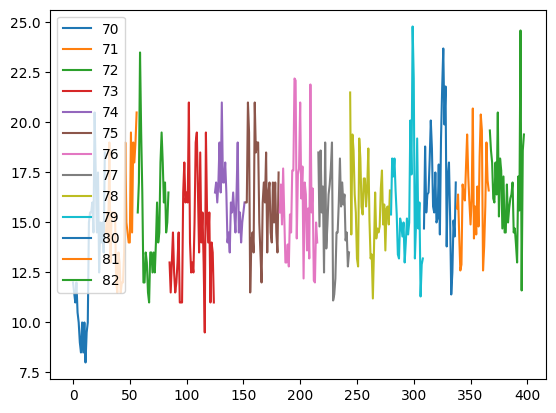

In [2]:
#cars.set_index("model_year", inplace=True)
cars.groupby("model_year")["acceleration"].plot(legend=True)


In [3]:
cars["model_year"].value_counts(sort=False)

70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
Name: model_year, dtype: int64

In [4]:
cars["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [5]:
cars["cylinders"].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

<AxesSubplot: xlabel='model_year', ylabel='acceleration'>

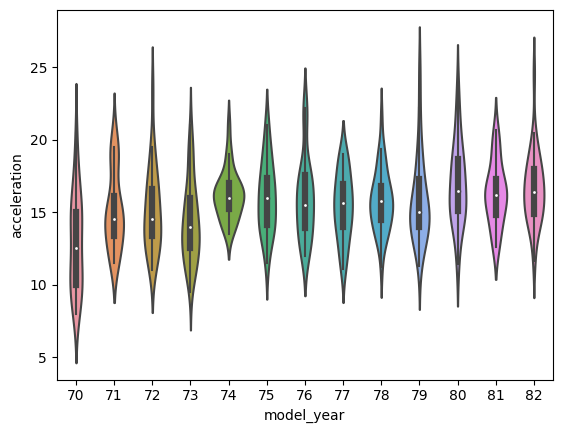

In [6]:
sns.violinplot(data = cars, x="model_year", y="acceleration")

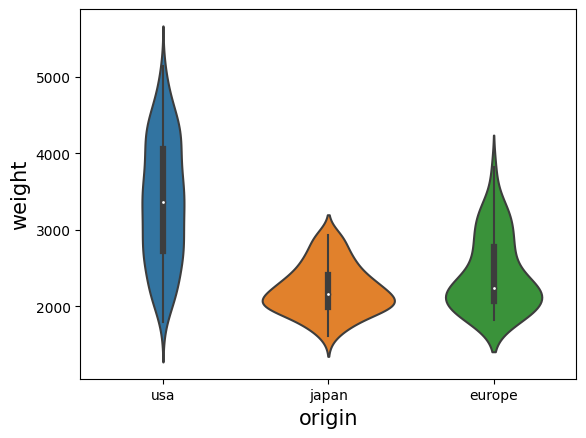

In [7]:
fig = sns.violinplot(data = cars, x="origin", y="weight", )
fig.set_ylabel("weight", fontsize=15)
fig.set_xlabel("origin", fontsize=15)
plt.savefig("images/origin_weight.png")

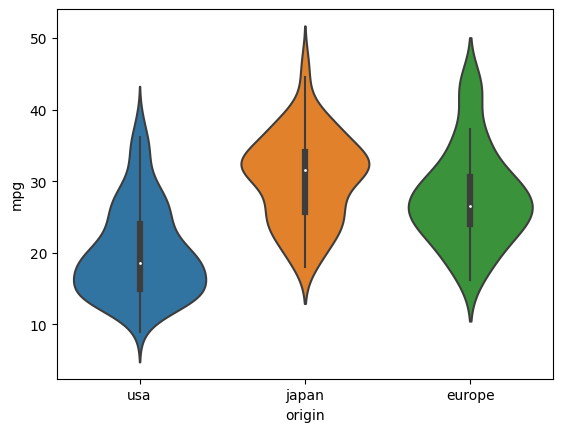

In [8]:
fig = sns.violinplot(data = cars, x="origin", y="mpg")

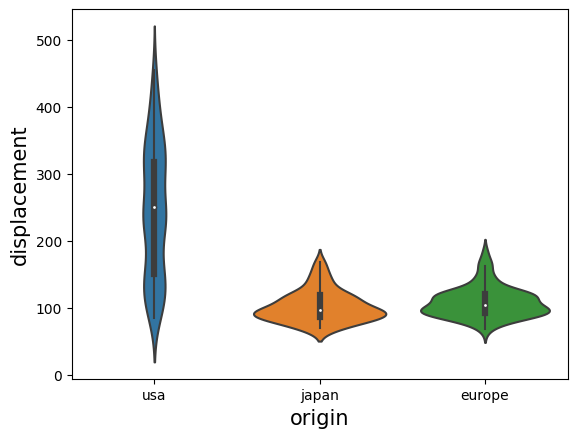

In [9]:
fig = sns.violinplot(data = cars, x="origin", y="displacement", )
fig.set_ylabel("displacement", fontsize=15)
fig.set_xlabel("origin", fontsize=15)
plt.savefig("images/origin_displacement.png")

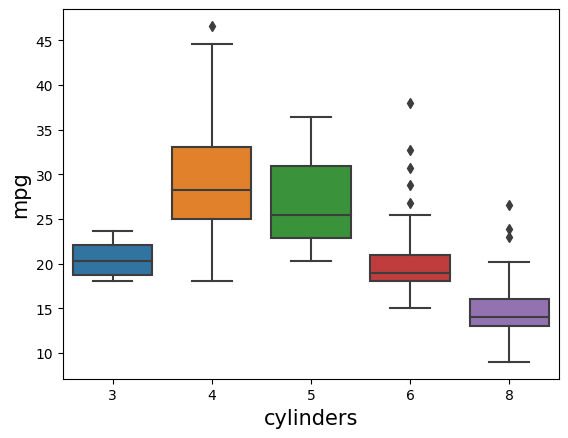

In [10]:
fig = sns.boxplot(data = cars, x="cylinders", y="mpg", )
fig.set_ylabel("mpg", fontsize=15)
fig.set_xlabel("cylinders", fontsize=15)
plt.savefig("images/cylinders_mpg.png")

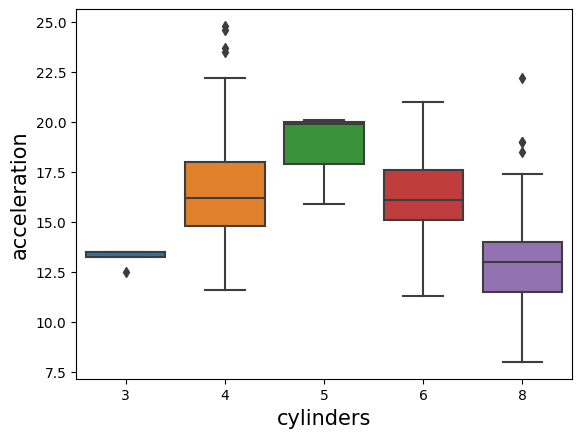

In [11]:
fig = sns.boxplot(data = cars, x="cylinders", y="acceleration", )
fig.set_ylabel("acceleration", fontsize=15)
fig.set_xlabel("cylinders", fontsize=15)
plt.savefig("images/cylinders_acceleration.png")

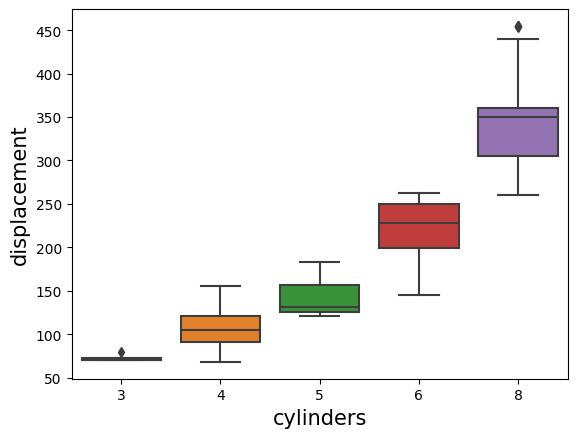

In [12]:
fig = origin_violin = sns.boxplot(data = cars, x="cylinders", y="displacement", )
fig.set_ylabel("displacement", fontsize=15)
fig.set_xlabel("cylinders", fontsize=15)
plt.savefig("images/cylinders_displacement.png")

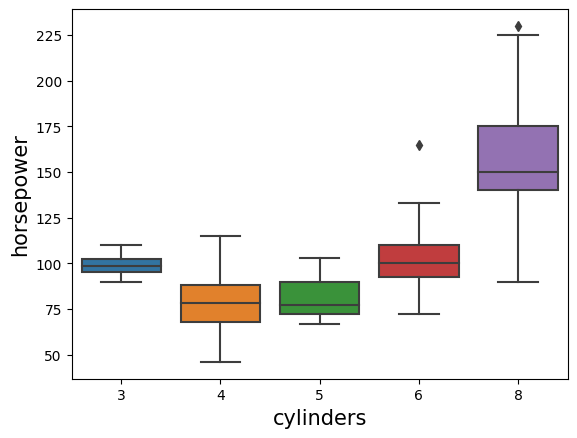

In [13]:
fig = origin_violin = sns.boxplot(data = cars, x="cylinders", y="horsepower")
fig.set_ylabel("horsepower", fontsize=15)
fig.set_xlabel("cylinders", fontsize=15)
plt.savefig("images/cylinders_horsepower.png")

<AxesSubplot: xlabel='origin', ylabel='weight'>

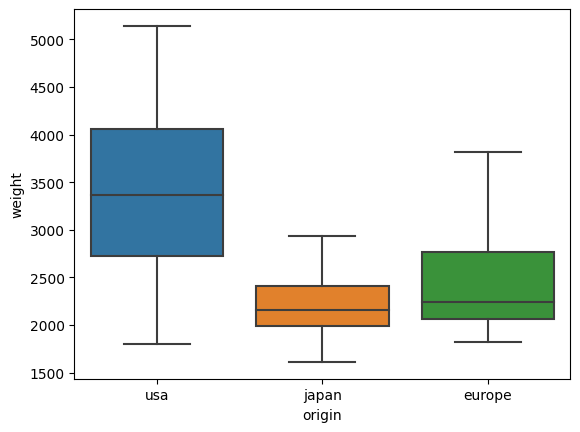

In [14]:
sns.boxplot(data = cars, x="origin", y="weight")

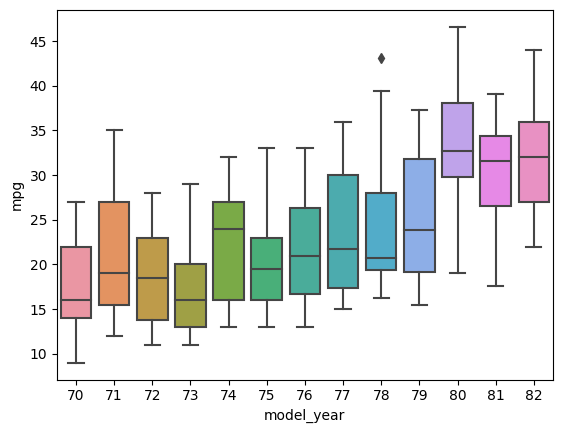

In [15]:
# 74 verkar vara en outlier, undersök vad som är speciellt med det året.

sns.boxplot(data = cars, x="model_year", y="mpg")
plt.savefig("images/boxplot_model_year_mpg.png")

<AxesSubplot: xlabel='model_year', ylabel='mpg'>

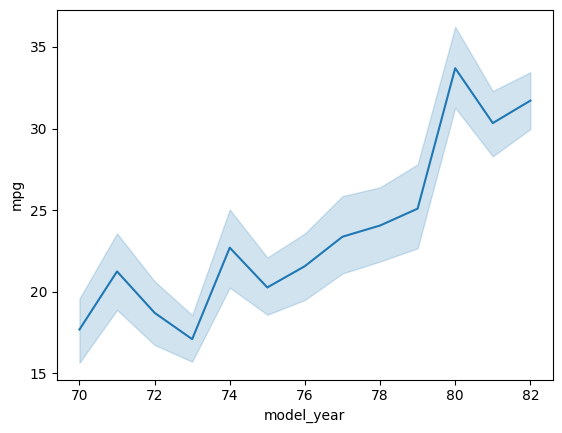

In [16]:
sns.lineplot(cars, x="model_year", y="mpg")

In [17]:

cars_describe = cars.describe()
cars_describe_styled = cars_describe.style.background_gradient()
dfi.export(cars_describe, "images/cars_describe.png")


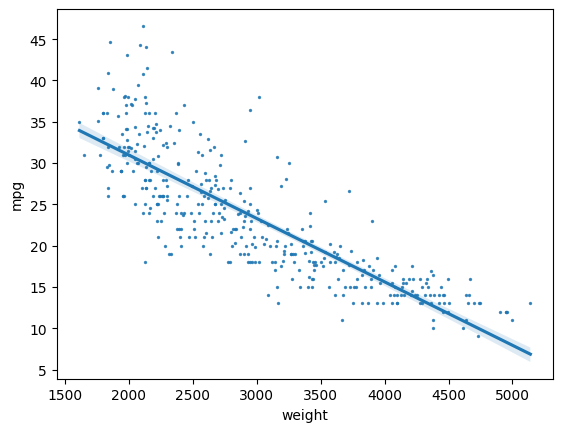

In [18]:

ax = sns.regplot(cars, x="weight", y="mpg", scatter_kws={"s":2})


plt.show()


<AxesSubplot: xlabel='cylinders', ylabel='acceleration'>

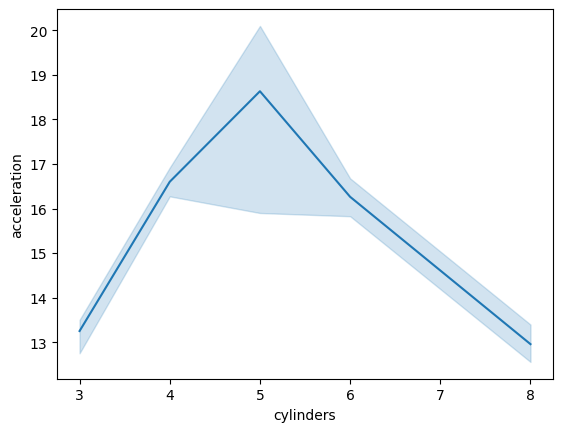

In [19]:
sns.lineplot(cars, x="cylinders", y="acceleration")

In [20]:
#test confidence interval: 5 cylinder/acceleration
import numpy as np
from scipy.stats import t

cyl_5 = cars[cars["cylinders"] == 5]
mean = np.mean(cyl_5["acceleration"])
std = np.std(cyl_5["acceleration"], ddof=1)
n = len(cyl_5)

alpha = 0.05
t_crit = t.ppf(1-alpha/2, n-1)
sem = std / np.sqrt(n)

upper = mean - t_crit * sem
lower = mean + t_crit * sem
print(upper, lower, mean, n)

12.747796470637667 24.518870196029 18.633333333333333 3


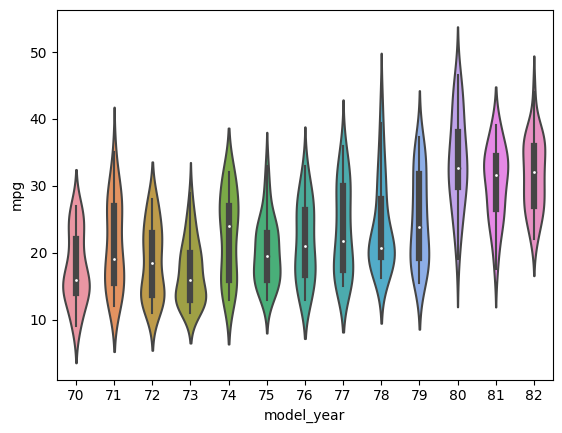

In [21]:
sns.violinplot(cars, x="model_year", y="mpg")
plt.savefig("images/violin_model_year_mpg.png")

In [22]:
stats.linregress(x=cars["weight"], y=cars["mpg"])

LinregressResult(slope=-0.007676610063926474, intercept=46.31736442026566, rvalue=-0.8317409332443353, pvalue=2.972799564049085e-103, stderr=0.00025748686280782293, intercept_stderr=0.795245229511182)

[]

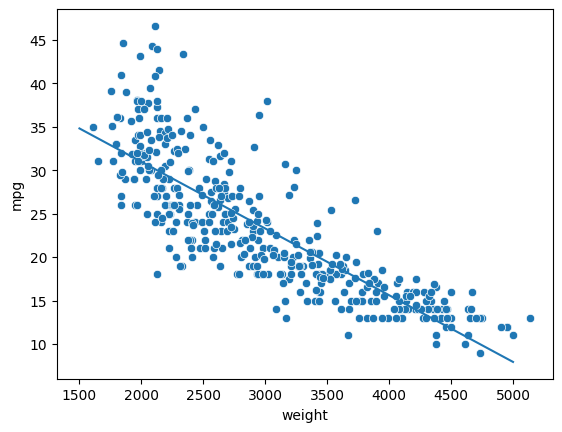

In [23]:
sns.scatterplot(cars, x="weight", y="mpg")

x = np.linspace(1500, 5000, 1000)
y = -0.00767661*x + 46.317
plt.plot(x, y)
plt.plot()

[]

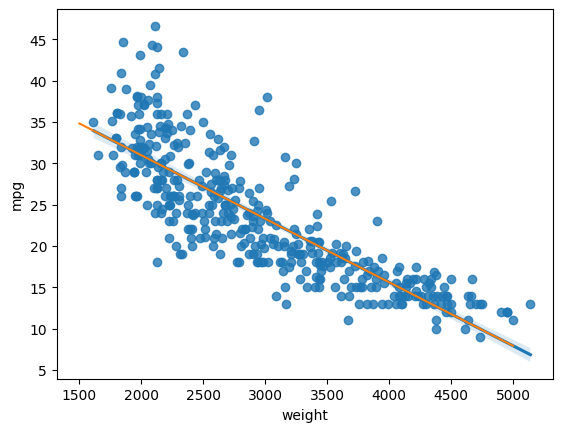

In [24]:
sns.regplot(cars, x="weight", y="mpg")
x = np.linspace(1500, 5000, 1000)
y = -0.00767661*x + 46.317
plt.plot(x, y)
plt.plot()

In [25]:
import statsmodels.formula.api as smf
results = smf.ols('mpg ~ model_year + C(weight)', data=cars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     7.251
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.75e-12
Time:                        08:42:46   Log-Likelihood:                -580.39
No. Observations:                 398   AIC:                             1865.
Df Residuals:                      46   BIC:                             3268.
Df Model:                         351                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -34.4845     10.321     -3.341      0.002     -55.259     -13.710
C(weight)[T.1649]    -6.9360      4.347     -1.596      0.117     -15.685       1.813
C(weight)[T.1755]    -5.6865      4.544     -1.251      0.217     -14.833       3.460
C(weight)[T.1760]    -9.6865      4.544     -2.132      0.038     -18.833      -0.540
C(weight)[T.1773]    -4.0000      4.327     -0.924      0.360     -12.709       4.709
C(weight)[T.1795]    -6.4039      3.799     -1.686      0.099     -14.050       1.243
C(weight)[T.1800]    -5.7506      3.871     -1.486      0.144     -13.542       2.041
C(weight)[T.1825]    -7.6326      3.824     -1.996      0.052     -15.330       0.065
C(weight)[T.1834]    -8.0000      4.327     -1.849      0.071     -16.709       0.709
C(weight)[T.1835]    -5.4646      3.788     -1.443      0.156     -13.089       2.160
C(weight)[T.1836]    -5.9360      4.347     -1.366      0.179     -14.685       2.813
C(weight)[T.1845]   -14.0079      4.503     -3.110      0.003     -23.073      -4.943
C(weight)[T.1850]     0.7921      4.503      0.176      0.861      -8.273       9.857
C(weight)[T.1867]    -7.9573      4.336     -1.835      0.073     -16.684       0.770
C(weight)[T.1875]    -5.7865      4.544     -1.273      0.209     -14.933       3.360
C(weight)[T.1915]    -7.1292      4.467     -1.596      0.117     -16.121       1.862
C(weight)[T.1925]   -10.9292      4.467     -2.447      0.018     -19.921      -1.938
C(weight)[T.1937]   -10.4039      3.799     -2.739      0.009     -18.050      -2.757
C(weight)[T.1940]   -11.8719      4.406     -2.694      0.010     -20.741      -3.003
C(weight)[T.1945]    -7.3719      4.406     -1.673      0.101     -16.241       1.497
C(weight)[T.1950]    -8.9466      3.763     -2.377      0.022     -16.521      -1.372
C(weight)[T.1955]    -9.0000      4.327     -2.080      0.043     -17.709      -0.291
C(weight)[T.1963]   -11.9360      4.347     -2.746      0.009     -20.685      -3.187
C(weight)[T.1965]   -10.7652      4.046     -2.661      0.011     -18.910      -2.621
C(weight)[T.1968]    -5.7079      4.503     -1.267      0.211     -14.773       3.357
C(weight)[T.1970]   -14.7652      4.588     -3.218      0.002     -24.001      -5.529
C(weight)[T.1975]    -8.2579      3.950     -2.091      0.042     -16.209      -0.307
C(weight)[T.1980]    -9.7652      4.588     -2.128      0.039     -19.001      -0.529
C(weight)[T.1985]    -7.3399      3.576     -2.053      0.046     -14.537      -0.143
C(weight)[T.1990]    -9.1219      3.838     -2.376      0.022     -16.848      -1.395
C(weight)[T.1995]    -7.7652      4.588     -1.692      0.097     -17.001       1.471
C(weight)[T.2000]    -6.9360      4.347     -1.596      0.117     -15.685       1.813
C(weight)[T.2003]    -5.9360      4.347     -1.366      0.179     -14.685

In [26]:
stats.linregress(x=cars["model_year"], y=cars["mpg"])

LinregressResult(slope=1.224445639736189, intercept=-69.55560174195777, rvalue=0.5792671330833097, pvalue=4.84493581336554e-37, stderr=0.0865852761941113, intercept_stderr=6.5891143899033455)